# Aufgabe 1: Fourier-Spektrum

Die zweidimensionale diskrete Fourier-Transformation $\mathcal{F}: \mathbb{R}^{W \times H} \rightarrow \mathbb{C}^{W \times H}$ überführt ein Bild in eine alternative Repräsentation, in der es als Überlagerung von Sinus- und Kosinusfunktionen unterschiedlicher Frequenz dargestellt wird:

$$
    \mathcal{F}(I)(u, v) = \sum_{x=0}^{W-1} \sum_{y=0}^{H-1} I(x, y) \cdot \exp\biggl(-2 \pi i \Bigl(\frac{ux}{W} + \frac{vy}{H}\Bigr)\biggr) \,.
$$

Zur kompakten Schreibweise der Sinus- und Kosinusfunktionen dient dabei die Eulersche Formel:

$$
    \exp(i \cdot \varphi) = \cos(\varphi) + i \cdot \sin(\varphi) \,.
$$

Das Ergebnis $\mathcal{F}(I)(u, v)$ ist eine Funktion über dem Raum der komplexen Zahlen, welche die Amplitude und Phase einer Welle mit horizontaler Frequenz $u$ und vertikaler Frequenz $v$ kodieren.
Der Betrag (auch *Magnitude*) dieser Fourier-Koeffizienten entspricht dabei der Amplitude der Welle und das Argument (Winkel zwischen den Koeffizienten) entspricht der Phase.

Verwenden Sie `numpy.fft.fft2` zur Berechnung der Fouriertransformation eines Bildes!
Danach befindet sich das Zentrum $\mathcal{F}(I)(0, 0)$ des Fourier-Spektrums in der linken oberen Ecke des transformierten Bildes.
Nutzen Sie daher `numpy.fft.fftshift`, um das Zentrum in den Bildmittelpunkt zu verschieben und stellen Sie sowohl Magnitude als auch Phase des Spektrums graphisch dar!
Da die Magnitude üblicherweise vom Koeffizienten $(0, 0)$ dominiert wird, sollte vor der Darstellung die Grauwerttransformation $x \mapsto \log(1+x)$ zur Kontrastverbesserung angewandt werden.

## 0. Pfade, Pakete etc.

In [4]:
import glob
import urllib.request

%matplotlib inline
import matplotlib.pyplot as plt

import PIL.Image
import numpy as np

In [7]:
image_filter = '../Bilder/*.jpg'

## 1. Laden und Normalisieren des Bildes

In [8]:
image_path = np.random.choice(glob.glob(image_filter))
image = np.asarray(PIL.Image.open(image_path).convert('L'))

In [9]:
image = image.astype(np.float32)
image -= image.min()
image /= image.max()

## 2. Berechnung der Fouriertransformation
Berechnen Sie nun die Fouriertransformation von `image`, indem Sie die entsprechende Funktion aus `numpy.fft` verwenden. Achten Sie darauf, das Spektrum zu zentrieren!

In [12]:
image_transformed = np.fft.fft2(image)
image_transformed = np.fft.fftshift(image_transformed)
image_transformed

array([[ 28.659904   -2.6212537j,   6.482703   +1.4616408j,
         -0.594151   +2.7590027j, ..., -31.766638  -12.414187j ,
         -3.9773357  +8.312711j ,  17.78041   +20.836922j ],
       [ 17.387278  +27.871319j ,  -7.877672   -2.1775582j,
          2.6207712  -6.892028j , ...,   4.285954  -23.41088j  ,
        -17.074774  -10.80142j  , -11.405521  +21.784948j ],
       [  1.3612483 +11.651503j ,   5.0116034  -9.054548j ,
         -5.208634   +0.5481496j, ...,   2.4771585 -10.361123j ,
          0.14862315-17.599144j ,  -8.670688   +2.584921j ],
       ...,
       [  1.3612483 -11.651503j ,  -8.670688   -2.584921j ,
          0.14862315+17.599144j , ...,  -1.5959206  +4.0836654j,
         -5.208634   -0.5481496j,   5.0116034  +9.054548j ],
       [ 17.387278  -27.871319j , -11.405521  -21.784948j ,
        -17.074774  +10.80142j  , ...,   5.762555  +15.407073j ,
          2.6207712  +6.892028j ,  -7.877672   +2.1775582j],
       [ 28.659904   +2.6212537j,  17.78041   -20.836922j 

## 3. Darstellung

Stellen Sie nun das Originalbild sowie Magnitude und Phase des Fourier-Spektrums graphisch dar.

Denken Sie daran, vor der Darstellung des Fourier-Spektrums die Grauwerttransformation $x \mapsto \log(1+x)$ anzuwenden.

[[28.779524   6.645437   2.822253  ... 34.10618    9.215224  27.391975 ]
 [32.850082   8.173095   7.373499  ... 23.799973  20.20442   24.590038 ]
 [11.73075   10.348961   5.2373977 ... 10.653131  17.599771   9.047798 ]
 ...
 [11.73075    9.047798  17.599771  ...  4.3844366  5.2373977 10.348961 ]
 [32.850082  24.590038  20.20442   ... 16.449465   7.373499   8.173095 ]
 [28.779524  27.391975   9.215224  ... 26.087599   2.822253   6.645437 ]]
[[-0.09120691  0.22175966  1.782907   ... -2.7690482   2.0170674
   0.8643822 ]
 [ 1.0130308  -2.8719053  -1.2074211  ... -1.3897263  -2.5775504
   2.0531063 ]
 [ 1.4544933  -1.0652776   3.03674    ... -1.3361195  -1.5623517
   2.85186   ]
 ...
 [-1.4544933  -2.85186     1.5623517  ...  1.9433517  -3.03674
   1.0652776 ]
 [-1.0130308  -2.0531063   2.5775504  ...  1.212885    1.2074211
   2.8719053 ]
 [ 0.09120691 -0.8643822  -2.0170674  ...  2.4450135  -1.782907
  -0.22175966]]


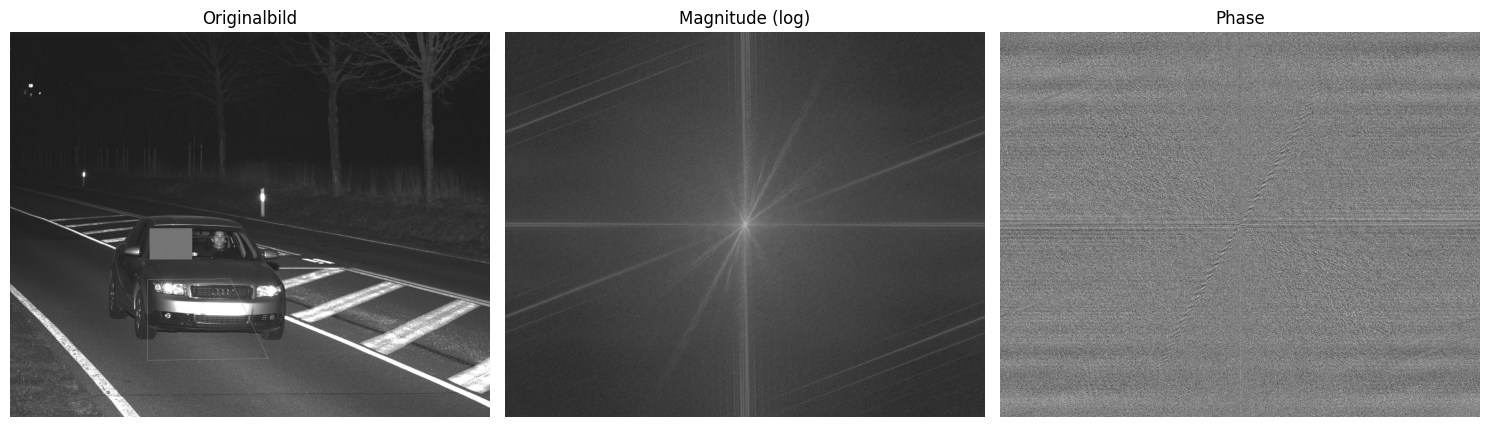

In [15]:
# Darstellung des Originalbildes, Magnitude und Phase des Fourier-Spektrums
magnitude = np.abs(image_transformed)
phase = np.angle(image_transformed)

print(magnitude)
print(phase)

# Grauwerttransformation für die Magnitude
magnitude_log = np.log1p(magnitude)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('Originalbild')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Magnitude (log)')
plt.imshow(magnitude_log, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Phase')
plt.imshow(phase, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()